<a href="https://colab.research.google.com/github/DLPY/Unsupervised-Learning-Session-2/blob/main/Local_Outlier_Factor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import random
import pandas as pd

pct = [.01,.08,.12]
amounts = [1000, 2000, 3000]
charges = pd.DataFrame()

for i in range(0, 1000):
  amount = random.choice(amounts) * (random.uniform(.95, 1.05))
  bank_charge = amount * .04 * (random.uniform(.95, 1.05))
  linedict = {'Amount': [amount], 'Charge':[bank_charge]}
  line = pd.DataFrame(linedict)
  charges = pd.concat([charges, line])

for i in range(0, 10):
  amount = random.choice(amounts) * (random.uniform(.95, 1.05))
  bank_charge = amount * random.choice(pct) * (random.uniform(.95, 1.05))
  linedict = {'Amount': [amount], 'Charge':[bank_charge]}
  line = pd.DataFrame(linedict)
  charges = pd.concat([charges, line])

In [8]:
charges.head(10)

,Amount,Charge
0,2081.169853,84.911474
0,2975.365430,121.613929
0,1033.298400,41.854875
0,2853.188165,110.961834
0,2068.395214,82.029372
0,2967.726838,120.142973
0,1925.055596,79.206699
0,1033.538621,41.823996
0,2971.873366,118.015569
0,3130.122449,125.708223


In [9]:
charges.tail(10)

,Amount,Charge
0,1915.874171,151.228578
0,1965.943896,159.645333
0,998.606235,122.701429
0,2013.632077,236.437274
0,1961.524505,234.532645
0,2882.132007,222.204575
0,2013.108625,162.511682
0,999.008808,10.138499
0,1047.244536,10.856608
0,985.927337,79.277138


In [10]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=30)
normalized_df=(charges-charges.mean())/charges.std()

clf.fit_predict(normalized_df)
results = clf.negative_outlier_factor_
charges['LOF'] = results.tolist()
charges['PCT'] = charges['Charge'] / charges['Amount']

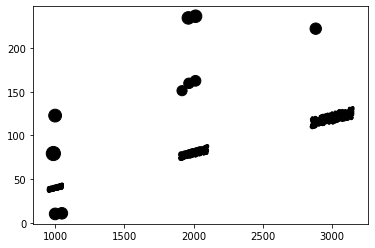

In [11]:
import matplotlib.pyplot as plt
plt.scatter(charges.Amount, charges.Charge, c='black', s=charges.LOF * -5)
plt.show()


In [12]:
charges.query('LOF < -1.5')

,Amount,Charge,LOF,PCT
0,2092.995741,87.162606,-1.539269,0.041645
0,2098.130647,87.909275,-1.819296,0.041899
0,2097.716655,86.995056,-1.530984,0.041471
0,2085.719604,87.204131,-1.505306,0.041810
0,1915.874171,151.228578,-20.565027,0.078935
0,1965.943896,159.645333,-21.951918,0.081205
0,998.606235,122.701429,-32.792241,0.122873
0,2013.632077,236.437274,-31.455307,0.117418
0,1961.524505,234.532645,-31.460365,0.119567
0,2882.132007,222.204575,-25.890705,0.077097
